<a href="https://colab.research.google.com/github/MeinaBian/CU_Btcamp_11_TimeSeries_FB_Prophet/blob/main/prophet_inclass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Student Activity: Prepare Data and Train a Prophet Model

This program is **part 1** of a two-part student activity. 

The first part reads in the CSV of hourly crypto trading data, conducts exploratory data analysis, and builds a forecast model using the Facebook Prophet package.

## Reading in and Preparing the Data

### Import the required libraries and dependencies

In [2]:
# Import the required libraries and dependencies
import pandas as pd
from pathlib import Path
from fbprophet import Prophet
import datetime as dt
%matplotlib inline

In [1]:
!pip install pystan
!pip install fbprophet

In [3]:
from google.colab import files
uploaded = files.upload()

Saving bitcoin_hourly.csv to bitcoin_hourly.csv


### Read in, prepare, and visualize the data

In [8]:
# Read csv file as DataFrame, with the first column as row index
df = pd.read_csv("bitcoin_hourly.csv", infer_datetime_format=True, parse_dates=True)

# Drop columns that won't be used
df = df.drop("volume",axis=1)

# Preview the dataset
df

,date,close
0,2017-08-17 05:00:00.000,4315.32
1,2017-08-17 06:00:00.000,4324.35
2,2017-08-17 07:00:00.000,4349.99
3,2017-08-17 08:00:00.000,4360.69
4,2017-08-17 09:00:00.000,4444.00
...,...,...
30743,2021-02-12 01:00:00.000,48477.50
30744,2021-02-12 02:00:00.000,47935.66
30745,2021-02-12 03:00:00.000,47587.31
30746,2021-02-12 04:00:00.000,47271.55


In [10]:
# Label the columns ds and y so that the syntax is recognized by Prophet
df.columns =["ds","y"]
# View dataframe shape, and the first and last five rows of the  DataFrame
df.shape

(30748, 2)

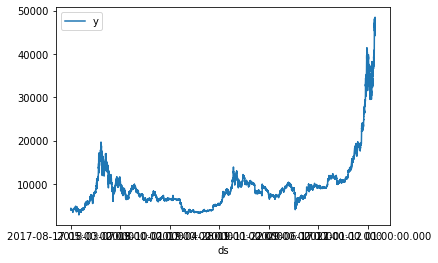

In [12]:
# sort the DataFrame by ds in ascending order, so to arrange the data chronologically from past to present
df= df.sort_values(by=["ds"])

# Use hvPlot to visually inspect the price data
df.plot(x="ds", y="y")

In [15]:
#model = Prophet()
#model.fit(df)

## Create a Prophet Model and Make Predictions

### Fitting the Model

In [22]:
# Call the Prophet function, store as an object
model = Prophet()
# Fit the time-series model.
model.fit(df)

### Making Model Predictions

In [23]:
# Create a future dataframe to hold predictions
# Make the prediction go out as far as 1000 hours (approx 40 days, or 1000/24 = 40)
future_trends = model.make_future_dataframe(periods=1000, freq="H") ## H"is by hour

# View the first and last five rows of the future dataframe
future_trends

,ds
0,2017-08-17 05:00:00
1,2017-08-17 06:00:00
2,2017-08-17 07:00:00
3,2017-08-17 08:00:00
4,2017-08-17 09:00:00
...,...
31482,2021-03-25 17:00:00
31483,2021-03-25 18:00:00
31484,2021-03-25 19:00:00
31485,2021-03-25 20:00:00


In [25]:
# Make the predictions for the trend data using the future_trends DataFrame
forecast_trends =  model.predict(future_trends)

# Display the first five rows of the forecast DataFrame
forecast_trends

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-08-17 05:00:00,5729.007558,2906.093329,5528.100518,5729.007558,5729.007558,-1475.592577,-1475.592577,-1475.592577,-6.079561,-6.079561,-6.079561,10.269046,10.269046,10.269046,-1479.782063,-1479.782063,-1479.782063,0.0,0.0,0.0,4253.414981
1,2017-08-17 06:00:00,5735.944085,2893.791799,5597.939643,5735.944085,5735.944085,-1479.347372,-1479.347372,-1479.347372,-4.069971,-4.069971,-4.069971,11.038822,11.038822,11.038822,-1486.316223,-1486.316223,-1486.316223,0.0,0.0,0.0,4256.596712
2,2017-08-17 07:00:00,5742.880611,2861.279062,5600.735895,5742.880611,5742.880611,-1483.683912,-1483.683912,-1483.683912,-2.476162,-2.476162,-2.476162,11.651468,11.651468,11.651468,-1492.859219,-1492.859219,-1492.859219,0.0,0.0,0.0,4259.196699
3,2017-08-17 08:00:00,5749.817138,3036.540368,5540.586455,5749.817138,5749.817138,-1490.692675,-1490.692675,-1490.692675,-3.379493,-3.379493,-3.379493,12.097822,12.097822,12.097822,-1499.411004,-1499.411004,-1499.411004,0.0,0.0,0.0,4259.124463
4,2017-08-17 09:00:00,5756.753665,2896.620891,5562.948496,5756.753665,5756.753665,-1499.895346,-1499.895346,-1499.895346,-6.294868,-6.294868,-6.294868,12.371056,12.371056,12.371056,-1505.971534,-1505.971534,-1505.971534,0.0,0.0,0.0,4256.858318
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31482,2021-03-25 17:00:00,45521.896799,51074.088888,56912.061596,43409.938030,48748.803714,7983.150971,7983.150971,7983.150971,-5.507689,-5.507689,-5.507689,8.329259,8.329259,8.329259,7980.329402,7980.329402,7980.329402,0.0,0.0,0.0,53505.047770
31483,2021-03-25 18:00:00,45528.059056,51171.215584,56938.594365,43413.810878,48762.088501,7986.806790,7986.806790,7986.806790,-3.632165,-3.632165,-3.632165,7.148875,7.148875,7.148875,7983.290079,7983.290079,7983.290079,0.0,0.0,0.0,53514.865846
31484,2021-03-25 19:00:00,45534.221314,50946.455481,56790.663029,43417.683726,48775.373287,7992.018256,7992.018256,7992.018256,-0.106210,-0.106210,-0.106210,5.862570,5.862570,5.862570,7986.261896,7986.261896,7986.261896,0.0,0.0,0.0,53526.239570
31485,2021-03-25 20:00:00,45540.383571,51017.875607,56887.400738,43421.018339,48788.658074,7997.891050,7997.891050,7997.891050,4.157270,4.157270,4.157270,4.488972,4.488972,4.488972,7989.244807,7989.244807,7989.244807,0.0,0.0,0.0,53538.274621


### Plotting Forecasts

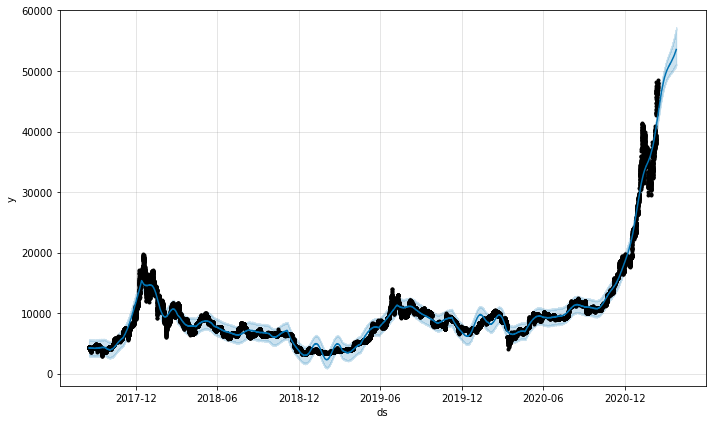

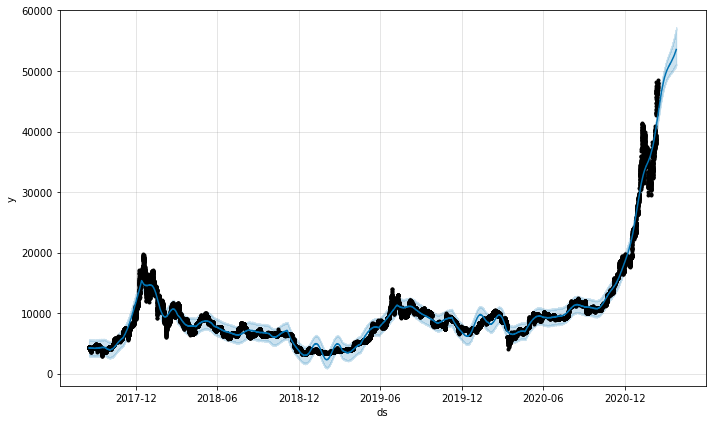

In [26]:
# Plot the Prophet predictions for the forecast_trends data
model.plot(forecast_trends)

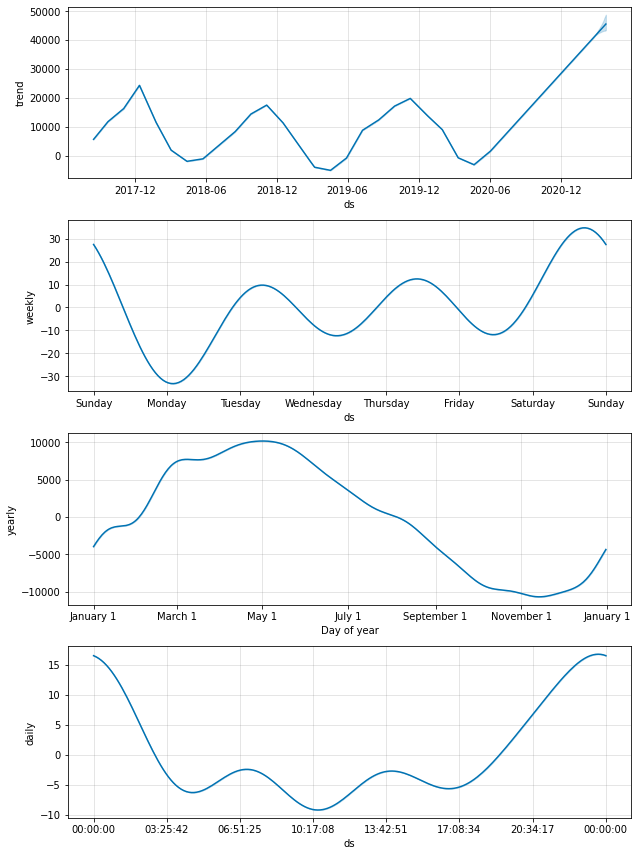

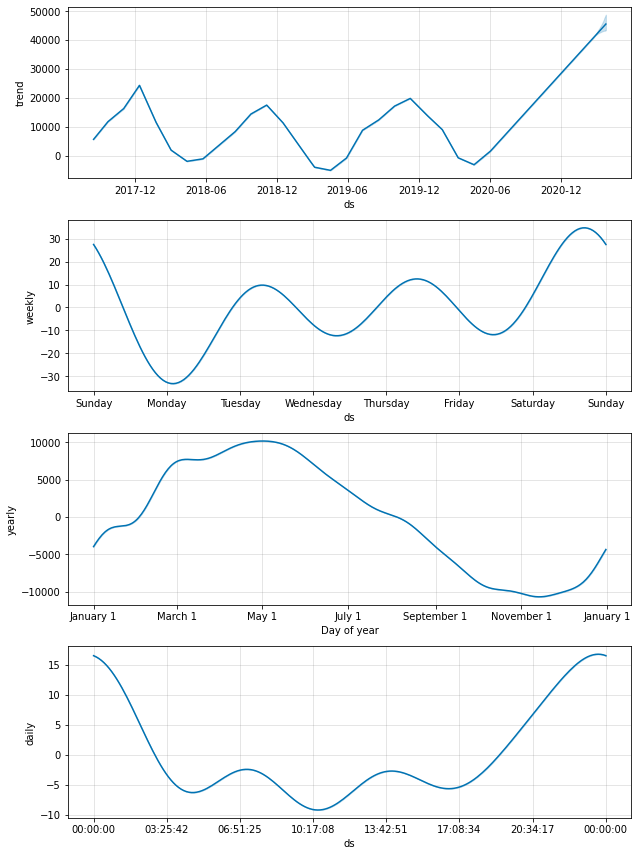

In [27]:
# Use the plot_components function to visualize the forecast results. #decompose 
model.plot_components(forecast_trends)

### Student Activity: Forecasting Part II

This program is **part 2** of a two-part student activity to analyze the forecasted data in more detail.

## Part 2: Analyzing Forecast Results

### Set index and Preview DataFrame

In [28]:
# At this point, it's useful to set the `datetime` index of the forecast data.
forecast_trends = forecast_trends.set_index(["ds"])

### Visualize the Upper and Lower ranges of a Forecast 
* `yhat` represents the most likely (average) forecast
* `yhat_lower` and `yhat_upper` represents the worst and best case prediction 
    * (These are based on what are known as 80% confidence intervals).

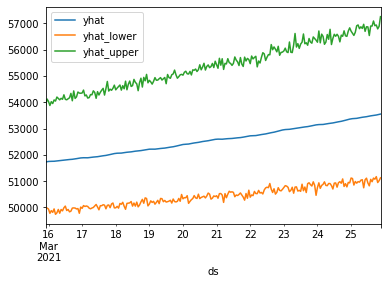

In [30]:
# From the `forecast_trends` DataFrame, use hvPlot to visualize
#  the yhat, yhat_lower, and yhat_upper columns over the last 10 days (24*10 = 240) 
forecast_trends[["yhat", "yhat_lower", "yhat_upper"]].iloc[-240:,:].plot()

### Narrowing a Forecast to a Specific Date Range

In [34]:
# Produce a forecast for a specific time window

# Create a `forecast_march_2021` Dataframe, which contains just forecasts for that month
# The DataFrame should include the columns yhat_upper, yhat_lower, and yhat
forecast_march_2021 = forecast_trends.loc["2021-03"][["yhat_upper","yhat_lower","yhat"]]

# Replace the column names to something less technical sounding
forecast_march_2021

#repalce col names
better_labels = {
     "yhat_upper": "best",
     "yhat_lower": "worst case",
     "yat": "most likely price"
}

# Review the last five rows of the DataFrame
forecast_march_2021 = forecast_march_2021.rename(columns=better_labels)

In [35]:
# Display the average forecasted price for March 2021
forecast_march_2021.describe()

,best,worst case,yhat
count,598.000000,598.000000,598.000000
mean,53676.194100,49582.120227,51395.656942
std,1671.443129,855.499666,1144.087967
min,50817.022549,47765.413336,49255.882178
25%,52328.189337,48933.092740,50500.424691
50%,53524.662682,49624.745516,51384.900640
75%,55016.729732,50262.122360,52298.082909
max,57256.785045,51171.215584,53550.434734


# Advanced Forecasting Methods in Facebook Prophet

### Detecting Abrupt Changes in Trend
**Change points** are points of time when the time series abruptly change in their trajectories. Prophet can automatically detect these change points.

In [36]:
# We still have our saved model from above:
model

In [ ]:
# We also have the saved forecasts from that model:
forecast_trends.head()

In [37]:
# Reset the index of this forecast dataframe in order to use changepoints:
forecast_trends =  forecast_trends.reset_index()
forecast_trends.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,daily_lower,daily_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2017-08-17 05:00:00,5729.007558,2906.093329,5528.100518,5729.007558,5729.007558,-1475.592577,-1475.592577,-1475.592577,-6.079561,-6.079561,-6.079561,10.269046,10.269046,10.269046,-1479.782063,-1479.782063,-1479.782063,0.0,0.0,0.0,4253.414981
1,2017-08-17 06:00:00,5735.944085,2893.791799,5597.939643,5735.944085,5735.944085,-1479.347372,-1479.347372,-1479.347372,-4.069971,-4.069971,-4.069971,11.038822,11.038822,11.038822,-1486.316223,-1486.316223,-1486.316223,0.0,0.0,0.0,4256.596712
2,2017-08-17 07:00:00,5742.880611,2861.279062,5600.735895,5742.880611,5742.880611,-1483.683912,-1483.683912,-1483.683912,-2.476162,-2.476162,-2.476162,11.651468,11.651468,11.651468,-1492.859219,-1492.859219,-1492.859219,0.0,0.0,0.0,4259.196699
3,2017-08-17 08:00:00,5749.817138,3036.540368,5540.586455,5749.817138,5749.817138,-1490.692675,-1490.692675,-1490.692675,-3.379493,-3.379493,-3.379493,12.097822,12.097822,12.097822,-1499.411004,-1499.411004,-1499.411004,0.0,0.0,0.0,4259.124463
4,2017-08-17 09:00:00,5756.753665,2896.620891,5562.948496,5756.753665,5756.753665,-1499.895346,-1499.895346,-1499.895346,-6.294868,-6.294868,-6.294868,12.371056,12.371056,12.371056,-1505.971534,-1505.971534,-1505.971534,0.0,0.0,0.0,4256.858318


In [41]:
# import plot change point function
from fbprophet.plot import add_changepoints_to_plot

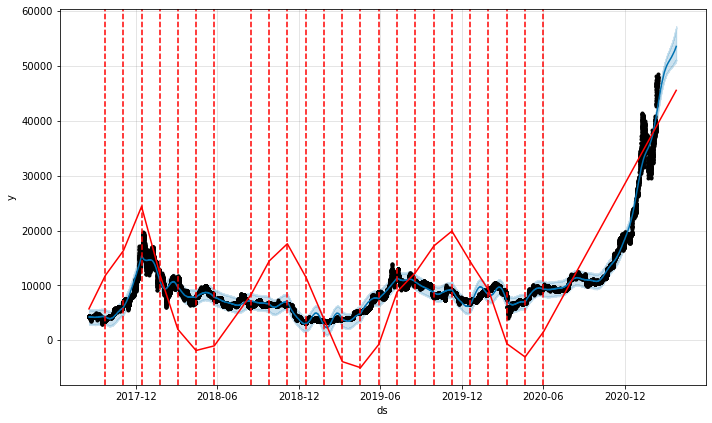

In [47]:
# plot forecast as usual
forecast_plot = model.plot(forecast_trends)

# add change points to plot; by default changepoints are only inferred for the first 80% of data to avoid overfitting,
# but this can be changed by using the changepoint_range argument of the model
changepoint_plot = add_changepoints_to_plot(forecast_plot.gca(),model, forecast_trends)

In [49]:
# print datetime of detected changepoints 
display(model.changepoints)

984     2017-09-22 05:00:00
1968    2017-11-02 05:00:00
2952    2017-12-13 05:00:00
3936    2018-01-23 05:00:00
4919    2018-03-04 00:00:00
5903    2018-04-14 00:00:00
6887    2018-05-25 00:00:00
7871    2018-07-05 07:00:00
8855    2018-08-15 00:00:00
9839    2018-09-25 00:00:00
10823   2018-11-05 00:00:00
11807   2018-12-16 00:00:00
12790   2019-01-25 23:00:00
13774   2019-03-07 23:00:00
14758   2019-04-17 23:00:00
15742   2019-05-28 23:00:00
16726   2019-07-08 23:00:00
17710   2019-08-18 23:00:00
18694   2019-09-28 23:00:00
19678   2019-11-08 23:00:00
20661   2019-12-19 22:00:00
21645   2020-01-29 22:00:00
22629   2020-03-10 22:00:00
23613   2020-04-20 22:00:00
24597   2020-05-31 22:00:00
Name: ds, dtype: datetime64[ns]

# Advanced Prophet Models - Modeling Holiday and Other Date Effects

### Modeling holiday effects in the Prophet model

To model the impact of holidays or other recurring events, you can use the Prophet's holiday function. In this exercise, we will use Prophet's built-in collection of country-specific holidays, and model how they impact the price of bitcoin.

In [ ]:
# Create a new Prophet model
# YOUR CODE HERE!

# Add the built-in US holidays to the model
# YOUR CODE HERE!

# Fit model
# YOUR CODE HERE!

In [ ]:
# Check what holidays are included
# YOUR CODE HERE!

In [ ]:
# Create a dataframe to hold predictions as far as 1000 hours (approx 40 days),
# using `make_future_dataframe`.
# YOUR CODE HERE!

In [ ]:
# Make the predictions for the trend data using the future_trends DataFrame
# YOUR CODE HERE!

In [ ]:
# Plot trend components - in addition to the weekly/yearly/daily trend, there's now also a plot for holiday effects
# YOUR CODE HERE!